<a href="https://colab.research.google.com/github/TanishqGoyal02/Google_collabANN/blob/main/TF_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Input, Conv2D, Dropout, Flatten, GlobalMaxPooling2D
from tensorflow.keras.models import Model

dataset= tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = dataset.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test= y_train.flatten(), y_test.flatten()



170508288/170498071 [==============================] - 2s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)

k=len(set(y_train))
print(k)

(50000, 32, 32, 3)
(50000,)
10


In [7]:
i=Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.5)(x)
x=Dense(1028, activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(k, activation='softmax')(x)

model = Model(i,x)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)








Epoch 1/15
1563/1563 [==============================] - 18s 4ms/step - loss: 1.5849 - accuracy: 0.4188 - val_loss: 1.2758 - val_accuracy: 0.5477
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2904 - accuracy: 0.5344 - val_loss: 1.1142 - val_accuracy: 0.6013
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1669 - accuracy: 0.5841 - val_loss: 1.0493 - val_accuracy: 0.6275
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0754 - accuracy: 0.6166 - val_loss: 1.0164 - val_accuracy: 0.6379
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0138 - accuracy: 0.6386 - val_loss: 0.9516 - val_accuracy: 0.6626
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9611 - accuracy: 0.6580 - val_loss: 0.8943 - val_accuracy: 0.6898
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9273 - accuracy: 0.6705 - val_loss: 0.8811 - val_accuracy

confusion matrix, without normalization
[[754  35  45  15   8   7  13   6  81  36]
 [  8 889  10   3   1   5   9   2  27  46]
 [ 87   7 588  45  70  79  71  33   9  11]
 [ 23   9  81 409  43 268  91  44  11  21]
 [ 21   5  69  57 634  54  82  61  15   2]
 [ 17   1  43 102  39 723  19  36   8  12]
 [  6   6  33  35  12  35 858   7   6   2]
 [ 17   6  37  22  50  65  11 769   4  19]
 [ 46  41  11  12   4   7   3   2 846  28]
 [ 38 144   9   5   6   7   6  10  24 751]]


AttributeError: ignored

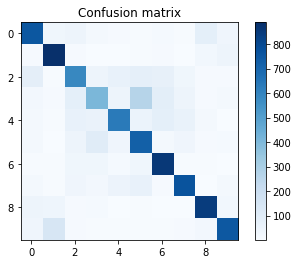

In [14]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newazis]
    print("Normalized confusion matrix")
  else:
    print("confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arrange(len(classes))
  plt.xticks(tick_marks, classes, rotation= 45)
  plt.yticks(tick_marks, classes)

  fmt ='.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j,i,format(cm[i,j], fmt),
             horizontalalignment= "center",
             color='white' if cm[i,j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

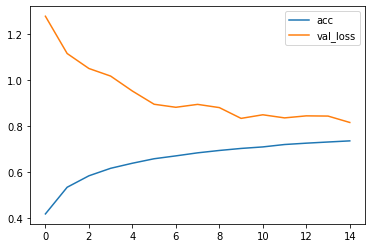

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()